In [1]:
import pandas as pd

In [2]:
!ls

data	     metrics.py		   preprocess.py  submission.csv  yb_train.py
dataset.py   model.py		   PW.ipynb	  train.py
lm_train.py  outputs		   __pycache__	  Untitled.ipynb
LSTM.ipynb   preprocess_mucgec.py  run.sh	  utils


In [3]:
train = pd.read_csv('data/yb_train.csv', sep='\t', error_bad_lines=False)
test = pd.read_csv('data/test1.csv', sep='\t', error_bad_lines=False)
pd.set_option('max_colwidth', 100)

/tmp/ipykernel_179132/3037293218.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv('data/yb_train.csv', sep='\t', error_bad_lines=False)
b'Skipping line 4761: expected 3 fields, saw 5\n'
/tmp/ipykernel_179132/3037293218.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv('data/test1.csv', sep='\t', error_bad_lines=False)


In [4]:
train.head()

,id,label,text
0,1,1,通过大力发展社区教育，使我省全民终身学习的教育体系已深入人心。
1,2,1,再次投入巨资的英超劲旅曼城队能否在2010-2011年度的英超联赛中夺得英超冠军，曼联、切尔西、阿森纳等传统豪门的球迷大多不相信。
2,3,1,广西居民纸质图书的阅读率偏低，手机阅读将成为了广西居民极倾向的阅读方式。
3,4,1,文字书写时代即将结束，预示着人与字之间最亲密的一种关系已经终结。与此同时，屏幕文化造就了另一种关系的可能性——我们将不再书写文字，而是选择字体。
4,5,1,安徽合力公司2006年叉车销售强劲，销售收入涨幅很有可能将超过40%以上。公司预计2006年度实现净利润与上年相比增长50%。


In [5]:
train['len'] = train.text.str.len()

In [6]:
train.head(40)

,id,label,text,len
0,1,1,通过大力发展社区教育，使我省全民终身学习的教育体系已深入人心。,31
1,2,1,再次投入巨资的英超劲旅曼城队能否在2010-2011年度的英超联赛中夺得英超冠军，曼联、切尔西、阿森纳等传统豪门的球迷大多不相信。,65
2,3,1,广西居民纸质图书的阅读率偏低，手机阅读将成为了广西居民极倾向的阅读方式。,36
3,4,1,文字书写时代即将结束，预示着人与字之间最亲密的一种关系已经终结。与此同时，屏幕文化造就了另一种关系的可能性——我们将不再书写文字，而是选择字体。,72
4,5,1,安徽合力公司2006年叉车销售强劲，销售收入涨幅很有可能将超过40%以上。公司预计2006年度实现净利润与上年相比增长50%。,63
5,6,1,为了营造和谐、安全的校园环境，确保广大未成年人的交通安全，天元交警大队采取有力措施，强化校园周边交通安全，净化学校交通环境。,62
6,7,0,苏明娟实现了从农家女孩到共青团安徽省委副书记的“逆袭”，这让我们看到：扶贫救困不能只顾解决眼前问题，更要立足长远培养脱贫能力。,63
7,8,1,在翻阅中国话剧100周年纪念活动资料时，他萌生了创作一台寻找中国话剧源头的剧本的意念。,43
8,9,1,下午三点整，参加成立典礼的群众全部到齐了。,21
9,10,1,"继亚马逊线下书店开张后,当当网也准备从线上走向线下，这一计划已处于实施阶段，线下书店将涵盖商场书店、超市书店、实体书店等多个类型。",65


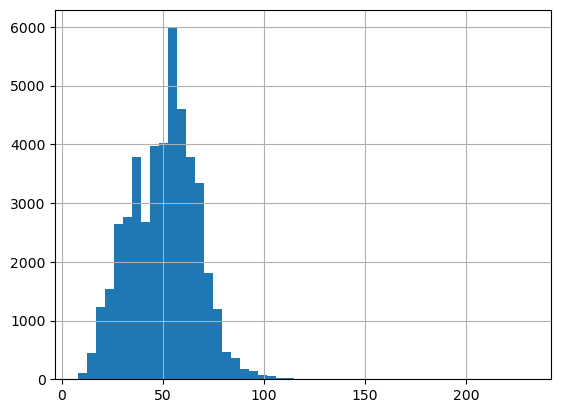

In [7]:
hist_len = train.len.hist(bins=50)

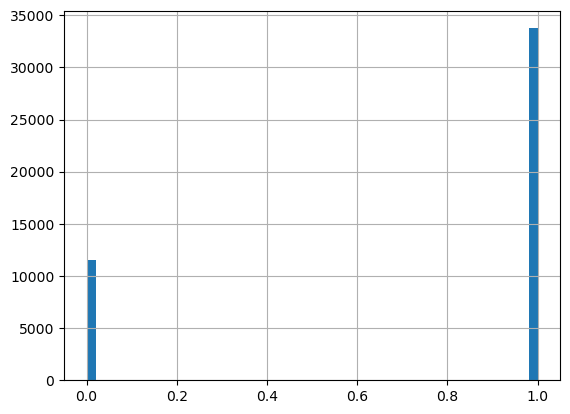

In [8]:
hist_label = train.label.hist(bins=50)

In [ ]:
max_len = max(train.len)
max_len

In [12]:
test.head()

,id,text
0,1,唐诗宋词是我国浩如烟海的古代文化中一块瑰丽的瑰宝，所以我们要好好珍惜，将它们传承下去。
1,2,这次迎新活动举办得非常成功，参加活动的人数超过1000人。
2,3,春天到了，山上姹紫嫣红的野花开得灿烂极了。
3,4,外公看到小明非常开心，不由分说地把他拉到了书房。
4,5,今天的解方程太难了，晓军用了整整一个小时左右才做完。


In [3]:
sub = pd.read_csv('submission.csv', sep='\t', error_bad_lines=False)

/tmp/ipykernel_158443/3693672700.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sub = pd.read_csv('submission.csv', sep='\t', error_bad_lines=False)


In [4]:
sub.head()

,id,label
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1


In [5]:
sub['label'].value_counts()

1    638
0    401
Name: label, dtype: int64

In [18]:
train['label'].value_counts()

1    33758
0    11488
Name: label, dtype: int64

In [19]:
11488/len(train)

0.2539008973168899

In [20]:
401/len(sub)

0.3859480269489894

In [11]:
sub_ensemble =  pd.read_csv('submission_ensemble.csv', sep='\t', error_bad_lines=False)
sub_ensemble['label'].value_counts()

/tmp/ipykernel_179132/912679177.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sub_ensemble =  pd.read_csv('submission_ensemble.csv', sep='\t', error_bad_lines=False)


1    662
0    377
Name: label, dtype: int64

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch
from transformers import AutoTokenizer, BertTokenizer

test = True
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
text = 'ldr\tw5, [x3, #0x2f74]'
if test:
    print("raw text:", text)
    # add_special_tokens=True is set by default
    text_enc = tokenizer.encode_plus(text)
    attn_mask = text_enc['attention_mask']
    text_enc = text_enc['input_ids']

    for tok in text_enc:
        print(tok, tokenizer.decode(tok))
        print(attn_mask)